In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# cheese jpg
img = cv2.imread('./img/banco.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

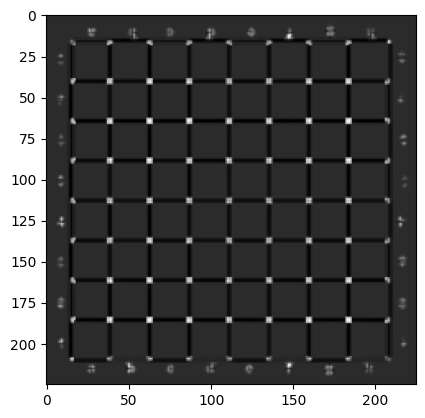

In [45]:
corner = cv2.cornerHarris(src = img, blockSize = 3, ksize =3, k = 0.04)
plt.imshow(corner, cmap = 'gray')

In [46]:
img = cv2.imread('./img/hoathinh.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

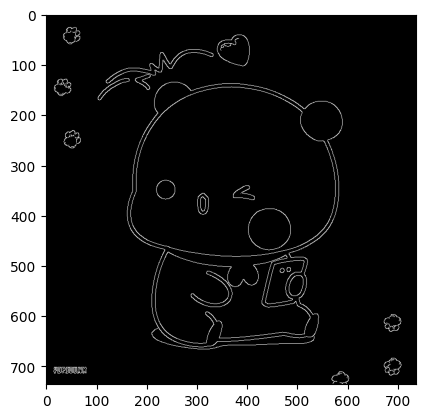

In [47]:
# using canny edge detector
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap = 'gray')

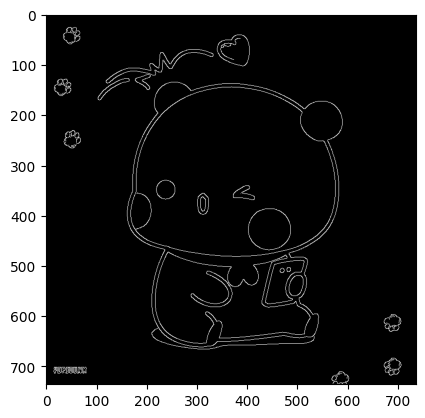

In [48]:
# Using Median find lower and upper
median = np.median(img)
lower = 0.7 * median
upper = 0.3 * median
edges = cv2.Canny(img, lower, upper)
plt.imshow(edges, cmap = 'gray')

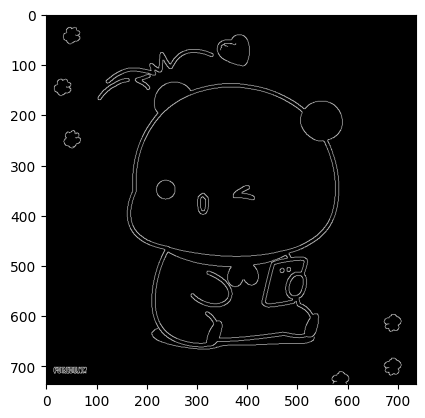

In [49]:
#3: Using smooth image 
img = cv2.GaussianBlur(img, (3,3), 0)
edges = cv2.Canny(img, 100, 200)
plt.imshow(edges, cmap = 'gray')

In [50]:
# import img bienso
img = cv2.imread('./img/bienso.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [51]:
# Using threshold cv2 to img
ret, thresh = cv2.threshold(gray, 127, 255, 0)
# Using Canny cv2 to gray
edges = cv2.GaussianBlur(img, (3,3), 0)
edges = cv2.Canny(edges, 100, 200)

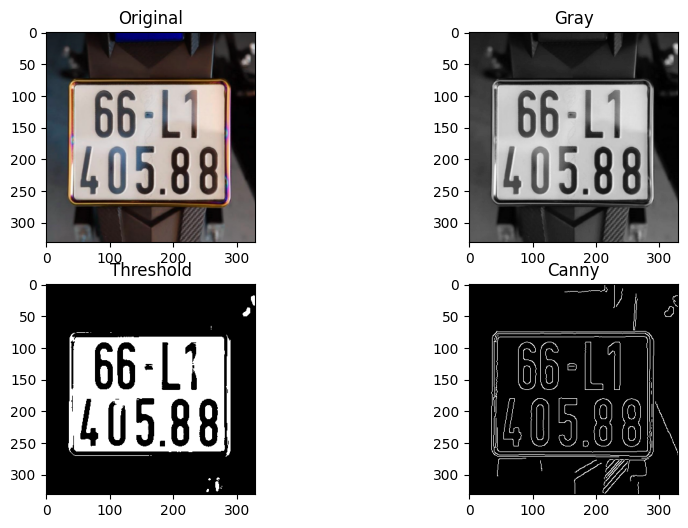

In [52]:
# in 4 photo to screen
# plt fix size
plt.figure(figsize=(10, 6))

# plt 1
plt.subplot(2, 2, 1, title = 'Original')
plt.imshow(img, cmap = 'gray')

#plt 2
plt.subplot(2, 2, 2, title = 'Gray')
plt.imshow(gray, cmap = 'gray')

# plt 3
plt.subplot(2, 2, 3, title = 'Threshold')
plt.imshow(thresh, cmap = 'gray')

# plt 4
plt.subplot(2, 2, 4, title = 'Canny')
plt.imshow(edges, cmap = 'gray')

In [53]:
img = cv2.imread('./img/anhshape.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur img
gray = cv2.GaussianBlur(gray, (5,5), 5)


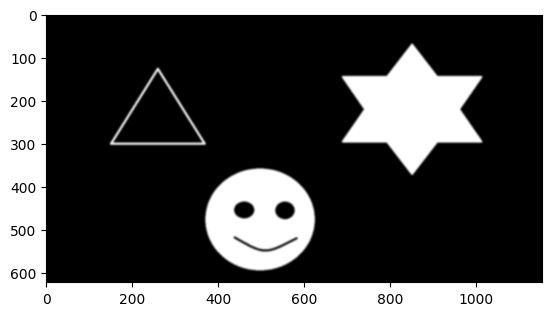

In [54]:
gray = cv2.GaussianBlur(gray, (5,5), 2)

plt.imshow(gray, cmap = 'gray')

In [55]:
# Using threshold cv2 to img
ret, thresh = cv2.threshold(gray, 127, 255, 0)

In [56]:
# Contours
# find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

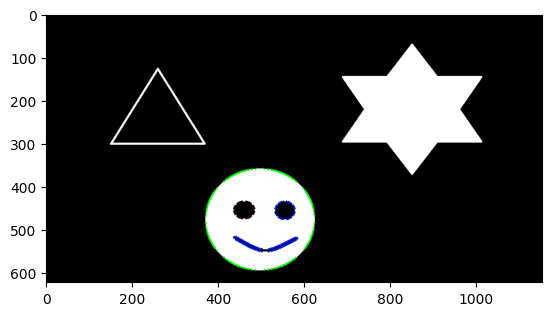

In [57]:
test = img.copy()
# Using polylines color gray black and white
cv2.polylines(test, contours[0], True, (0, 255, 0), 3)
cv2.polylines(test, contours[1], True, (0, 23, 220), 3)
cv2.polylines(test, contours[2], True, (0, 23, 230), 3)
cv2.polylines(test, contours[3], True, (23, 0, 0), 3)

plt.imshow(test, cmap = 'gray')

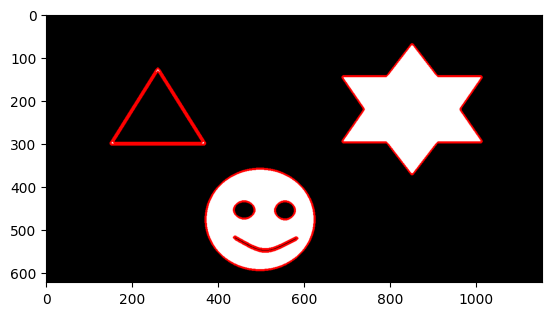

In [58]:
#draw all
test = img.copy()
for i in range(len(contours)):
    a = cv2.drawContours(test, contours, i, (255, 0, 0), 3)
plt.imshow(a, cmap = 'gray')

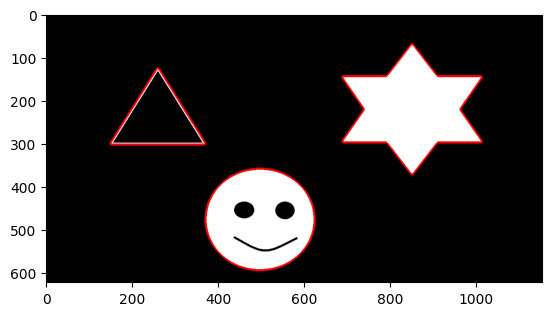

In [59]:
# Draw Parent Contours:
test = img.copy()
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        a = cv2.drawContours(test, contours, i, (255, 0, 0), 3)
plt.imshow(a, cmap = 'gray')

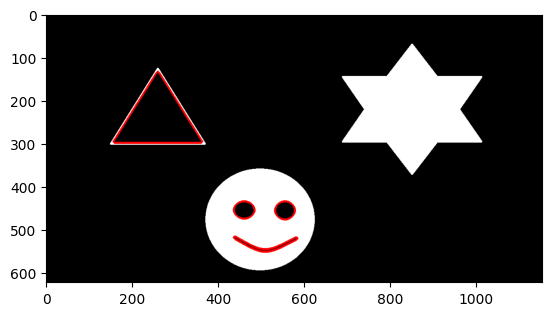

In [60]:
# Draw Child Contours:
test = img.copy()
for i in range(len(contours)):
    if hierarchy[0][i][3] != -1:
        a = cv2.drawContours(test, contours, i, (255, 0, 0), 3)
plt.imshow(a, cmap = 'gray')

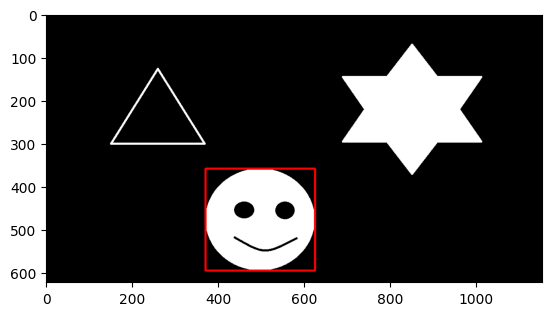

In [61]:
# Draw bounding box Contours:
test = img.copy()
x1,y1,w1,h1 = cv2.boundingRect(contours[0])
a = cv2.rectangle(test, (x1,y1), (x1+w1, y1+h1), (255, 0, 0), 3)
plt.imshow(a)

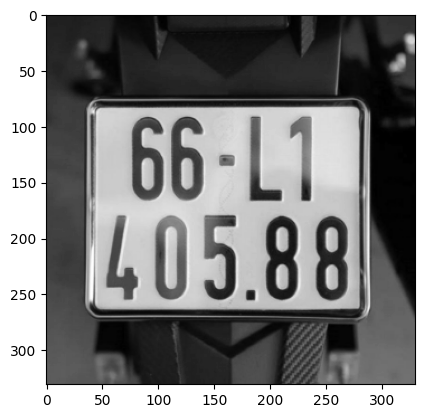

In [62]:
# Read image benso
img = cv2.imread('./img/bienso.jpg')
# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')

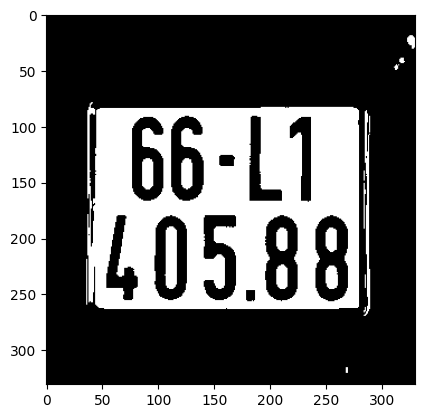

In [63]:
# Threshold
ret, thresh = cv2.threshold(gray, 160, 200, 0)
plt.imshow(thresh, cmap='gray')

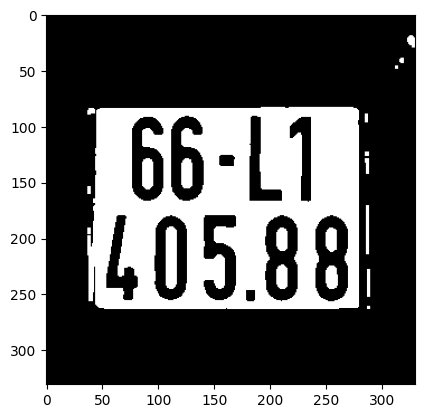

In [64]:
# Morphology sharpen
kernel = np.ones((3,3), np.uint8)
sharpen = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(sharpen, cmap = 'gray')

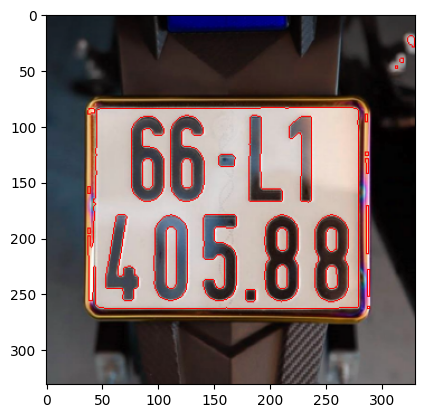

In [65]:
# Find contours sharpen
contours, hierarchy = cv2.findContours(sharpen.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Draw contours
test = img.copy()
for i in range(len(contours)):
    a = cv2.drawContours(test, contours, i, (255, 0, 0), 1)
plt.imshow(a, cmap = 'gray')

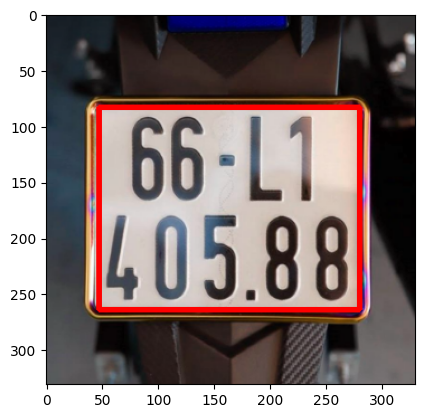

In [66]:
# Find object contours
test = img.copy()
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    if w > 50 and h > 50:
        a = cv2.rectangle(test, (x+10,y), (x+w, y+h), (255, 0, 0), 3)

plt.imshow(a, cmap = 'gray')

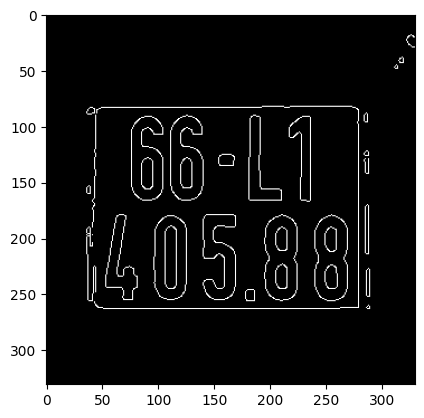

In [67]:
# use Canny find object license plates
edges = cv2.Canny(sharpen, 100, 200)
plt.imshow(edges, cmap = 'gray')

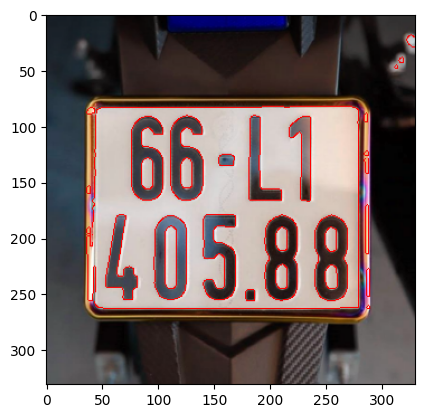

In [68]:
# find Contour edges
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Draw Contour edges
test = img.copy()
for i in range(len(contours)):
    a = cv2.drawContours(test, contours, i, (255, 0, 0), 1)
plt.imshow(a, cmap = 'gray')


In [69]:
# use getPerspectiveTransform and warpPerspective to get object license plates 
test = img.copy()
for i in range(len(contours)):
    x,y,w,h = cv2.boundingRect(contours[i])
    if w > 50 and h > 50:
        # a = cv2.rectangle(test, (x+10,y), (x+w, y+h), (255, 0, 0), 3)
        pts1 = np.float32([[x,y], [x+w, y], [x, y+h], [x+w, y+h]])
        pts2 = np.float32([[0,0], [w, 0], [0, h], [w, h]])
        M = cv2.getPerspectiveTransform(pts1, pts2)
        dst = cv2.warpPerspective(test, M, (w, h))
        break


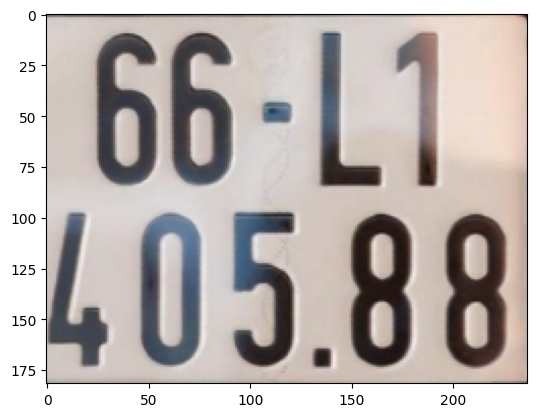

In [70]:
plt.imshow(dst)

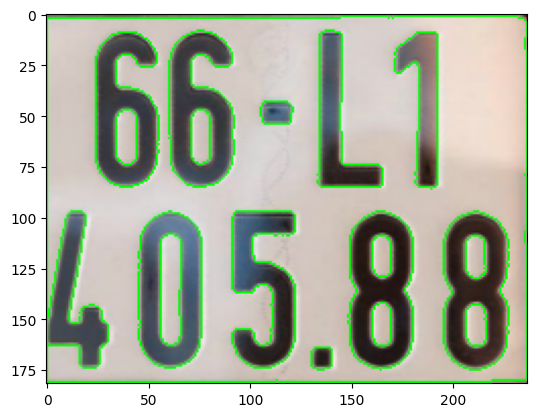

In [72]:
# find contours object from dst
gray = cv2.cvtColor(dst, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 160, 200, 0)
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Draw contours
test = dst.copy()
for i in range(len(contours)):
    a = cv2.drawContours(test, contours, i, (0, 255, 0), 1)
plt.imshow(a, cmap = 'gray')


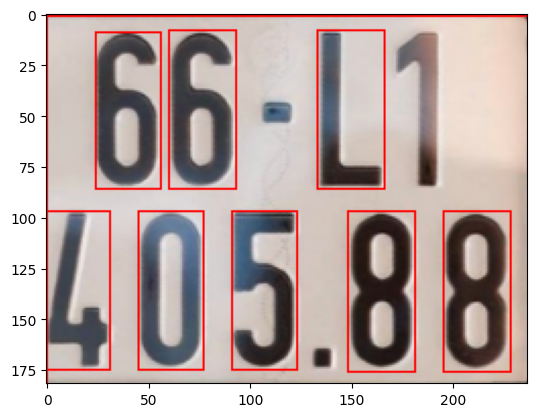

In [82]:
# use getPerspectiveTransform and warpPerspective to get object license plates from dst
test = dst.copy()
for i in range(len(contours)):
    # draw shape
    x,y,w,h = cv2.boundingRect(contours[i])
    if w > 30 and h > 30:
        a = cv2.rectangle(test, (x,y), (x+w, y+h), (255, 0, 0), 1)

plt.imshow(a)

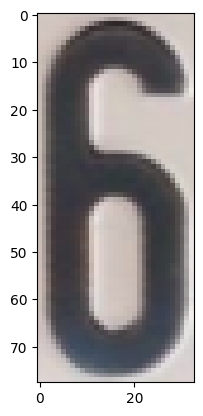

In [77]:
# use getPerspectiveTransform and warpPerspective to get object license plates from dst
test = dst.copy()
for i in range(len(contours)):
    # draw shape
    x,y,w,h = cv2.boundingRect(contours[i])
    if w > 10 and h > 10:
        # a = cv2.rectangle(test, (x+10,y), (x+w, y+h), (255, 0, 0), 3)
        pts1 = np.float32([[x,y], [x+w, y], [x, y+h], [x+w, y+h]])
        pts2 = np.float32([[0,0], [w, 0], [0, h], [w, h]])
        M = cv2.getPerspectiveTransform(pts1, pts2)
        dst_number = cv2.warpPerspective(test, M, (w, h))

plt.imshow(dst_number)